In [1]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [2]:
dataset_folder = '../../../datasets/diabetes/'
target_idx = 8
balance = True
#features_to_use = [0, 1, 2, 3, 4, 5, 6, 7]
features_to_use = [2, 3, 4, 5, 6]
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'diabetes.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use, 
            discretize=True, balance=balance, skip_first=True)
            
print(dataset.train[2])

[0. 1. 3. 0. 3.]


In [3]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 100
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print(dm.space_size())
explainer = ae.ArgTabularExplainer(dm, 'diabetesshort_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm)

# tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.94
Test 0.6666666666666666
1024
diabetesshort_100
Generating arguments
len  1 : 1 ,  0
20 potential arg checked ( 0 not minimal)
len  2 : 17 ,  9
141 potential arg checked ( 8 not minimal)
len  3 : 61 ,  86
265 potential arg checked ( 147 not minimal)
len  4 : 5 ,  1
26 potential arg checked ( 309 not minimal)
len  5 : 0 ,  0
0 potential arg checked ( 79 not minimal)
Total number of arguments:  180
Saving to  ../../saves\diabetesshort_100_minimals.df


In [4]:
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'diabetesshort_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))

Train 0.8785046728971962
Test 0.6851851851851852
diabetesshort_42
Total number of arguments:  107
Saving to  ../../saves\diabetesshort_42_minimals.df
edges per node: 15.02803738317757
nodes: 107
edges: 804
diabetesshort_84
Total number of arguments:  146
Saving to  ../../saves\diabetesshort_84_minimals.df
edges per node: 13.547945205479452
nodes: 146
edges: 989
diabetesshort_126
Total number of arguments:  192
Saving to  ../../saves\diabetesshort_126_minimals.df
edges per node: 11.708333333333334
nodes: 192
edges: 1124
diabetesshort_168
Total number of arguments:  208
Saving to  ../../saves\diabetesshort_168_minimals.df
edges per node: 10.23076923076923
nodes: 208
edges: 1064
diabetesshort_210
Total number of arguments:  215
Saving to  ../../saves\diabetesshort_210_minimals.df
edges per node: 8.874418604651163
nodes: 215
edges: 954
diabetesshort_252
Total number of arguments:  209
Saving to  ../../saves\diabetesshort_252_minimals.df
edges per node: 8.009569377990431
nodes: 209
edges: 8

[1096, 1124, 1064, 954, 837, 827, 907, 955, 936, 804, 789, 956, 989]
(42, 50, 80, 84, 100, 126, 168, 210, 252, 294, 336, 378, 428) (107, 108, 140, 146, 170, 192, 208, 215, 209, 213, 241, 245, 262)


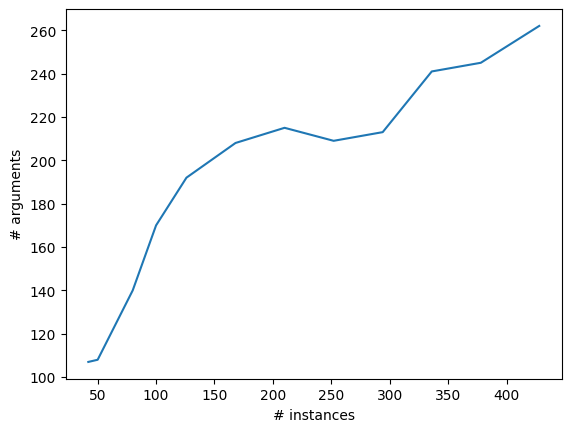

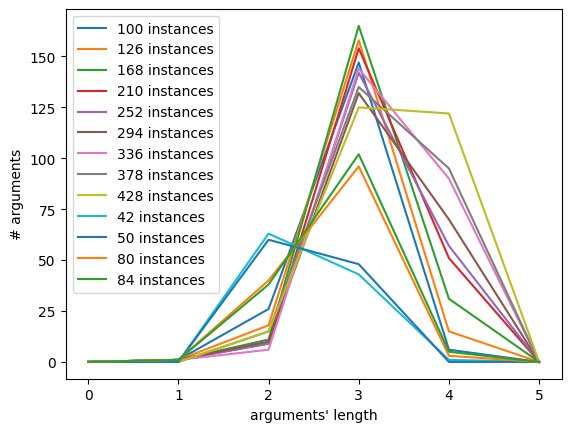

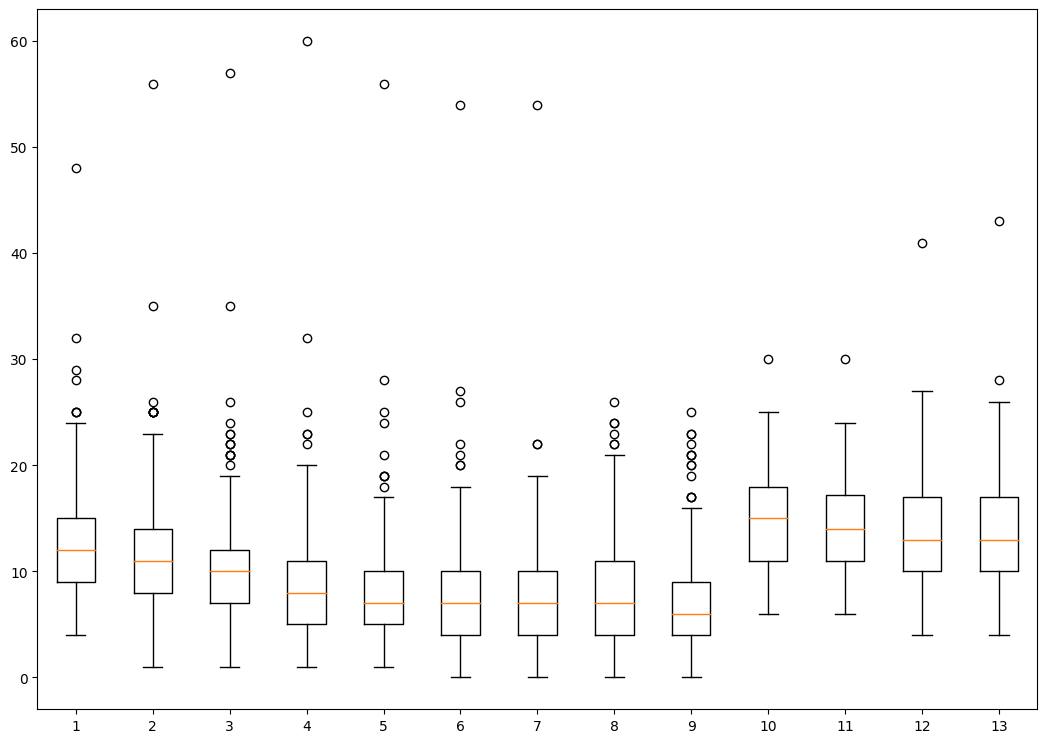

(428, 378, 336, 294, 252, 210, 168, 126, 100, 84, 80, 50, 42) (0.011450381679389277, 0.008163265306122436, 0.012448132780082943, 0.009389671361502372, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


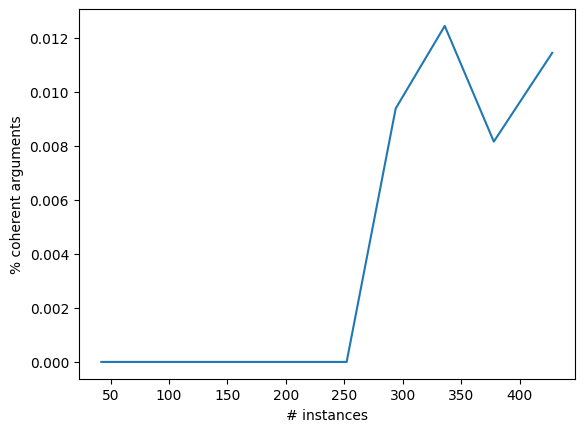

In [5]:
explainer.af_analysis()

In [38]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../../saves')
print(len(G.nodes()))

diabetesshort_50
edges per node: 14.61111111111111
108


[211460, 154450, 2303352, 114713, 82090, 54653, 31453, 14048, 0, 546608, 1488040, 913479, 1080708, 1392633, 772173, 37634, 554489, 411603, 316629, 250699, 197328]
(50, 100, 200, 300, 400, 10752, 21504, 32256, 43008, 53760, 64512, 75264, 86016, 96768, 107520, 118272, 129024, 139776, 150528, 161280, 172032) (435, 1048, 1729, 2258, 2800, 37542, 47303, 51001, 51122, 50106, 49368, 48795, 47572, 45844, 43529, 40607, 37520, 34229, 30720, 27759, 24846)


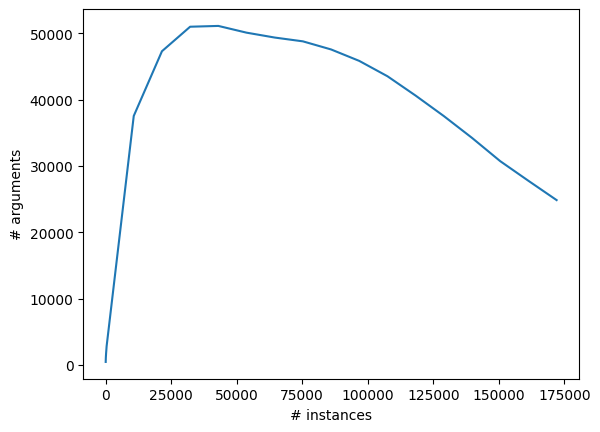

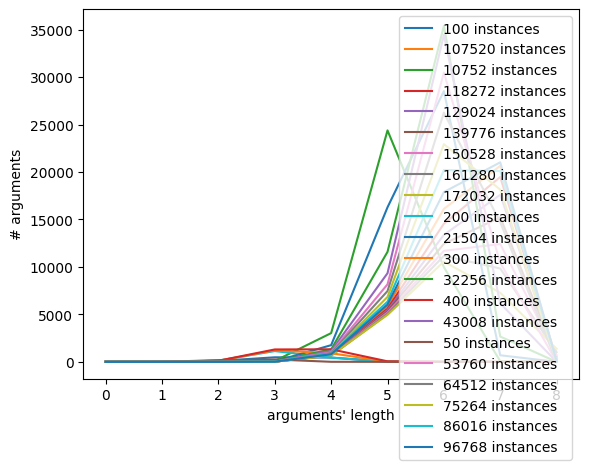

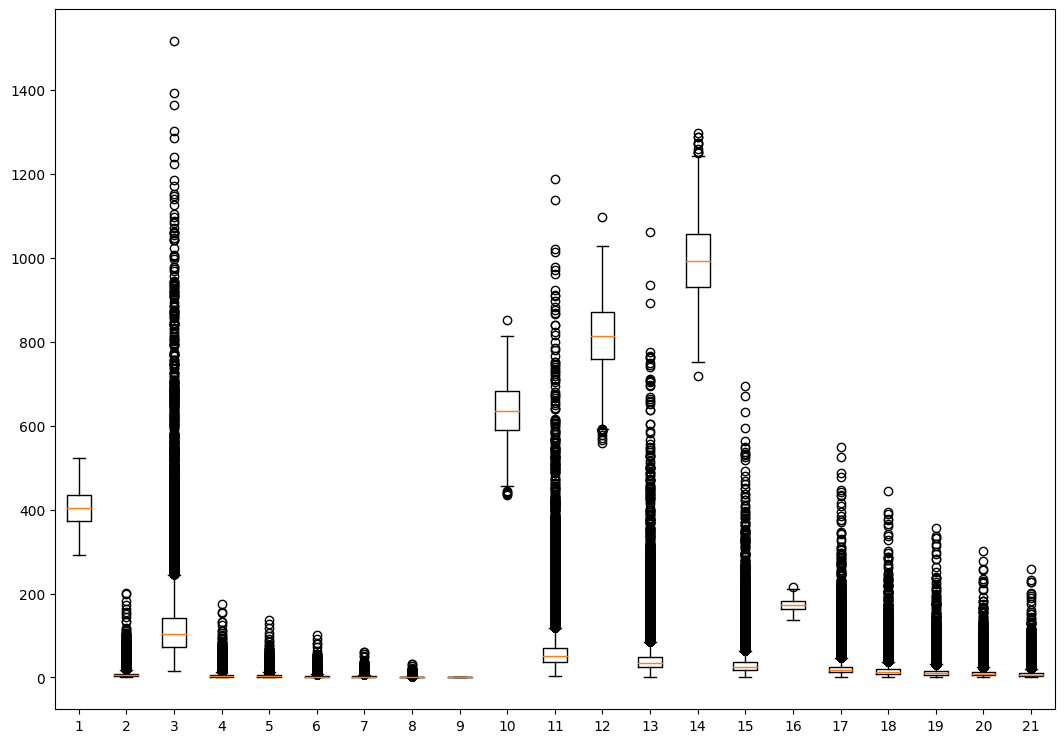

(172032, 161280, 150528, 139776, 129024, 118272, 107520, 96768, 86016, 75264, 64512, 53760, 43008, 32256, 21504, 10752, 400, 300, 200, 100, 50) (1.0, 0.6035880255052415, 0.3759765625, 0.2251891670805457, 0.13179637526652455, 0.07644002265619232, 0.04116795699418774, 0.02128959078614434, 0.010089968889262613, 0.004570140383235999, 0.0018635553394911186, 0.00039915379395683015, 9.780525018587838e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


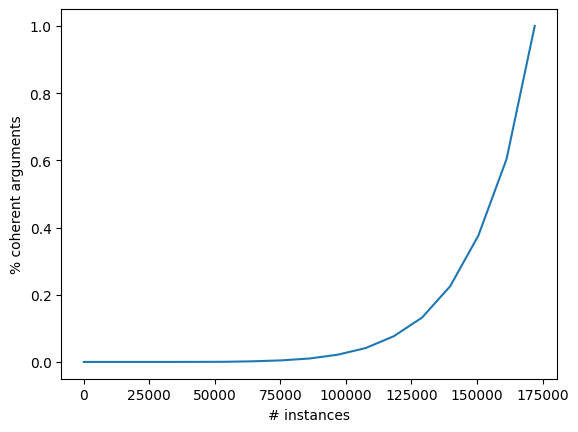

In [15]:
explainer.af_analysis()

In [8]:
from typing import OrderedDict
import networkx as nx
from sklearn import preprocessing
import random

le = preprocessing.LabelEncoder()
#print(explainer.categorical_names)
#print(explainer.categorical_features)
#print(explainer.ordinal_features)
#le.set_params(explainer.feature_names)

def generate_full_dataset():
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    full_dataset = []
    def gen_rec(instance, columns, col_index, full_dataset):
        inst_ = instance.copy()
        if col_index == len(columns) - 1:
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                full_dataset.append(list(inst_.values()))
        else:
            inst_ = instance.copy()
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                gen_rec(inst_, columns, col_index + 1, full_dataset)

    gen_rec(instance, list(instance.keys()), 0, full_dataset)
    return full_dataset

def generate_instance_random(constraints):
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    for f in constraints:
        col=explainer.col_p_feature[f]
        instance[col] = explainer.feature_names[f].split('_')[1]
        fill_instance(instance, 'random')
    return list(instance.values())

def fill_instance(instance, strategy):
    if strategy == 'random':
        # fill the instance with a random values sampled from baseline dataset
        for i_, col in enumerate(instance.keys()):
            if instance[col] is None:
                instance[col] = explainer.dataset[col].sample(1, random_state=1).values[0]
    elif strategy == 'most_frequent':
        # fill the instance with the most frequent value for each column
        for k, i_ in enumerate(instance.keys()):
            if instance[k] is None:
                instance[k] = explainer.dataset[i_].value_counts().index[0]
    
def instance2encoded(instance, dataset):
    encoded = []
    for col in dataset.categorical_features:
        encoded.append(dataset.categorical_names[col].index(instance[col]))
    return np.array(encoded)

def extend_dataset(G, dataset_t, y_t):
    # attackers = []
    # print(G.degree)
    # for v, deg in G.degree:
    #     if deg > 0:
    #         attackers += G.edges(v)
    # print('len attackers:', len(attackers))
    # print(attackers[0])
    # # predict new data
    # transformed_data_plus = []
    # y_plus = []
    # print("Generating " + str(len(attackers)) + " new data...")
    # addition_set = set([tuple(i) for i in dataset_t])
    # for a in attackers:
    #     # print(a, [explainer.feature_names[k] for k in a[1]])
    #     inst = generate_instance_random(set.union(set(a[0]), set(a[1])))
    #     if tuple(inst) not in addition_set:
    #         addition_set.add(tuple(inst))
    #         transformed_data_plus.append(inst)
    #         y_plus.append(c.predict(instance2encoded(inst, dataset).reshape(1, -1))[0])
    # print(str(len(transformed_data_plus)) + " instances added")
    # print(str(len(y_plus)) + " instances predicted")

    full_dataset = generate_full_dataset()
    transformed_data_plus = full_dataset
    encoded_data_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    y_plus = encoded_data_plus
    train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    dataset_t += transformed_data_plus
    y_t += y_plus
    print('total length', len(dataset_t), len(y_t))
    train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)
    #print(train_data_plus.shape)
    #print(y_plus)
    explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'diabetes_' + str(nb_vals) + '_extended', compute=True, output_path='../../saves')

    G = explainer.build_attack_graph(compute=True, display_graph=True)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    return G, dataset_t, y_t

def explore_full_dataset(nb_steps):
    full_dataset = generate_full_dataset()
    y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    random.seed(1)
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    full_dataset_shuff = [full_dataset[i] for i in indices] 
    y_plus_shuff = [y_plus[i] for i in indices]

    print(np.unique(np.array(y_plus_shuff)))
    print('len full', len(full_dataset_shuff))
    step_len = len(full_dataset)//nb_steps
    steps = [i*step_len for i in range(5, nb_steps)]
    steps.append(len(full_dataset))
    for nb_vals in steps:
        dataset_t = full_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'diabetes_' + str(nb_vals) + '_synth', compute=True, output_path='../../saves')

        G = explainer.build_attack_graph(compute=True, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

# dataset_t = transformed_data[:nb_vals]
# y_t = y[:nb_vals]
# # dataset_t = []
# # y_t = []
# for k in range(0, 1):
#     print('iteration', k)
#     G, dataset_t, y_t = extend_dataset(G, dataset_t, y_t)
#     print('uniques', len(set([tuple(i) for i in dataset_t])))

explore_full_dataset(16)

[0 1]
len full 172032
total length 53760 53760
Generating arguments
len  1 : 0 ,  0
41 potential arg checked ( 0 not minimal)
len  2 : 0 ,  0
690 potential arg checked ( 0 not minimal)
len  3 : 32 ,  0
6368 potential arg checked ( 0 not minimal)
len  4 : 880 ,  116
35015 potential arg checked ( 665 not minimal)
len  5 : 5117 ,  3049
109163 potential arg checked ( 16021 not minimal)
len  6 : 15108 ,  15361
155353 potential arg checked ( 113182 not minimal)
len  7 : 4072 ,  6370
37627 potential arg checked ( 213845 not minimal)
len  8 : 0 ,  1
1 potential arg checked ( 53759 not minimal)
Saving to  ../saves\diabetes_53760_synth_minimals.df
diabetes_53760_synth
total args: 50106
edges per node: 22.132638805731847
total length 64512 64512
Generating arguments
len  1 : 0 ,  0
41 potential arg checked ( 0 not minimal)
len  2 : 0 ,  0
690 potential arg checked ( 0 not minimal)
len  3 : 28 ,  0
6368 potential arg checked ( 0 not minimal)
len  4 : 828 ,  95
35097 potential arg checked ( 583 not

In [ ]:
explainer.af_analysis(remove=['adult_'])

In [40]:
#ext_gen = explainer.extension_generator_from_graph()
ext_gen = explainer.extension_generator_from_sat(file='../../saves/diabetesshort_50_sat.txt')
#max_covi_ext = explainer.make_selection('max_covi_incl', ext_gen)
max_covi_ext = explainer.make_selection('max_card', ext_gen)
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations(verbose=True)

Using pre-processed file...
Reading ../../saves/diabetesshort_50_sat_preprocessed.txt
Time for selection:  54.090741872787476
Len max_cov_exts:  1
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 0 Arg 1/0: None
id: 2 coverage: 9 Arg 1/5: frozenset({'DiabetesPedigreeFunction_DiabetesPedigreeFunction > 0.63', 'BMI_BMI <= 27.30'})
id: 3 coverage: 9 Arg 1/4: frozenset({'SkinThickness_SkinThickness > 32.00', 'Insulin_Insulin > 127.25'})
id: 4 coverage: 13 Arg 1/5: frozenset({'SkinThickness_SkinThickness > 32.00', 'Insulin_Insulin > 127.25'})
id: 5 coverage: 8 Arg 1/5: frozenset({'BMI_BMI > 36.60', 'Insulin_Insulin <= 0.00'})
id: 6 coverage: 0 Arg 1/0: None
id: 7 coverage: 10 Arg 1/5: frozenset({'SkinThickness_SkinThickness > 32.00', 'Insulin_Insulin > 127.25'})
id: 8 coverage: 0 Arg 1/0: None
id: 9 coverage: 0 Arg 1/0: None
id: 10 coverage: 5 Arg 1/4: frozenset({'SkinThickness_SkinThickness <= 0.00', 'DiabetesPedigreeFunction_0.24 < DiabetesPedigreeFunction <= 0.37'})
id: 11 coverage: 0 Arg